# Map of AgWeatherNet weather stations

In [1]:
library(data.table)
library(rnaturalearth)
library(rnaturalearthdata)
library(ggplot2)
library(rworldmap)
library(dplyr)
library(geosphere)
library(gpclib)
library(tidyverse)
library(mapdata)
library(raster)

Loading required package: sp

### Welcome to rworldmap ###

For a short introduction type : 	 vignette('rworldmap')


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


General Polygon Clipper Library for R (version 1.5-6)
	Type 'class ? gpc.poly' for help

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ tibble  3.0.1     ✔ purrr   0.3.4
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()   masks data.table::between()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::first()     masks data.table::first()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::last()      masks data.table::last()
✖ purrr:

## Import AgWeatherNet locations

In [2]:
AWN = read.csv('/Users/davidwheeler/Desktop/RESEARCH/Data/LateBightForecast/Data/AgWeatherNet.csv')

Sanity checks

In [3]:
str(AWN)

'data.frame':	193 obs. of  25 variables:
 $ Station.ID                               : int  100000 100001 100002 100003 100004 100005 100006 100007 100008 100009 ...
 $ Station.Name                             : Factor w/ 193 levels "08CF15*","100Circles",..: 46 192 51 180 179 16 106 104 30 127 ...
 $ Tier                                     : Factor w/ 3 levels "Tier 1","Tier 2",..: 1 3 3 3 3 3 3 3 3 3 ...
 $ Sponsor                                  : Factor w/ 21 levels "Boise State University",..: 17 17 17 17 17 17 17 17 17 17 ...
 $ Installation.Date                        : Factor w/ 159 levels "1989-01-08","1989-03-28",..: 145 145 145 145 145 145 145 145 145 146 ...
 $ Data.Quality.Review.Date                 : Factor w/ 141 levels "1989-01-01","1989-01-08",..: 127 128 128 128 128 128 128 128 128 129 ...
 $ Latitude                                 : num  45.6 45.7 45.6 45.2 45.2 ...
 $ Longitude                                : num  121 122 122 121 121 ...
 $ Station.Elevation..f

In [4]:
dim(AWN)

[1] 193  25

In [5]:
sort(unique(AWN$County))

[1]              Adams        Asotin       Benton       Chelan      
 [6] Clallam      Clark        Columbia     Douglas      Ferry       
[11] Franklin     Garfield     Grant        Grays Harbor Hood River  
[16] Island       Jefferson    King         Kitsap       Kittitas    
[21] Klickitat    Lewis        Lincoln      Linn         Marion      
[26] Nez Perce    Okanogan     Pacific      Pierce       Skagit      
[31] Skamania     Snohomish    Spokane      Stevens      Thurston    
[36] Walla Walla  Wasco        Whatcom      Whitman      Yakima      
40 Levels:  Adams Asotin Benton Chelan Clallam Clark Columbia Douglas ... Yakima

convert to data table

In [6]:
AWN = setDT(AWN)

How many stations are in potato-producing counties?

In [7]:
nrow(AWN[County == "Whatcom" | County == "Skagit" | County == "Kittitas" | County == "Grant" | County == "Adams" |
                      County == "Franklin" | County == "Benton" |  County == "Walla Walla" | County == "Klickitat" | County == "Yakima" , ])

[1] 111

Out of?

In [9]:
nrow(AWN)

[1] 193

Proportion of weather stations used for this study

In [10]:
nrow(AWN[County == "Whatcom" | County == "Skagit" | County == "Kittitas" | County == "Grant" | County == "Adams" |
                      County == "Franklin" | County == "Benton" |  County == "Walla Walla" | County == "Klickitat" | County == "Yakima" , ]) /
nrow(AWN)

[1] 0.5751295

In [15]:
length(unique(AWN$Station.ID))

[1] 193

## PNW

Data

In [7]:
# Obtain data
us <- getData("GADM",country="USA",level=1)
canada <- getData("GADM",country="CAN",level=1)
# States and provinces
states    <- c('Montana', 'Idaho', 'Oregon', 'Washington')
provinces <- c("British Columbia", "Alberta")

Subset data

In [8]:
us.states <- us[us$NAME_1 %in% states,]
ca.provinces <- canada[canada$NAME_1 %in% provinces,]

plot

Regions defined for each Polygons

Regions defined for each Polygons



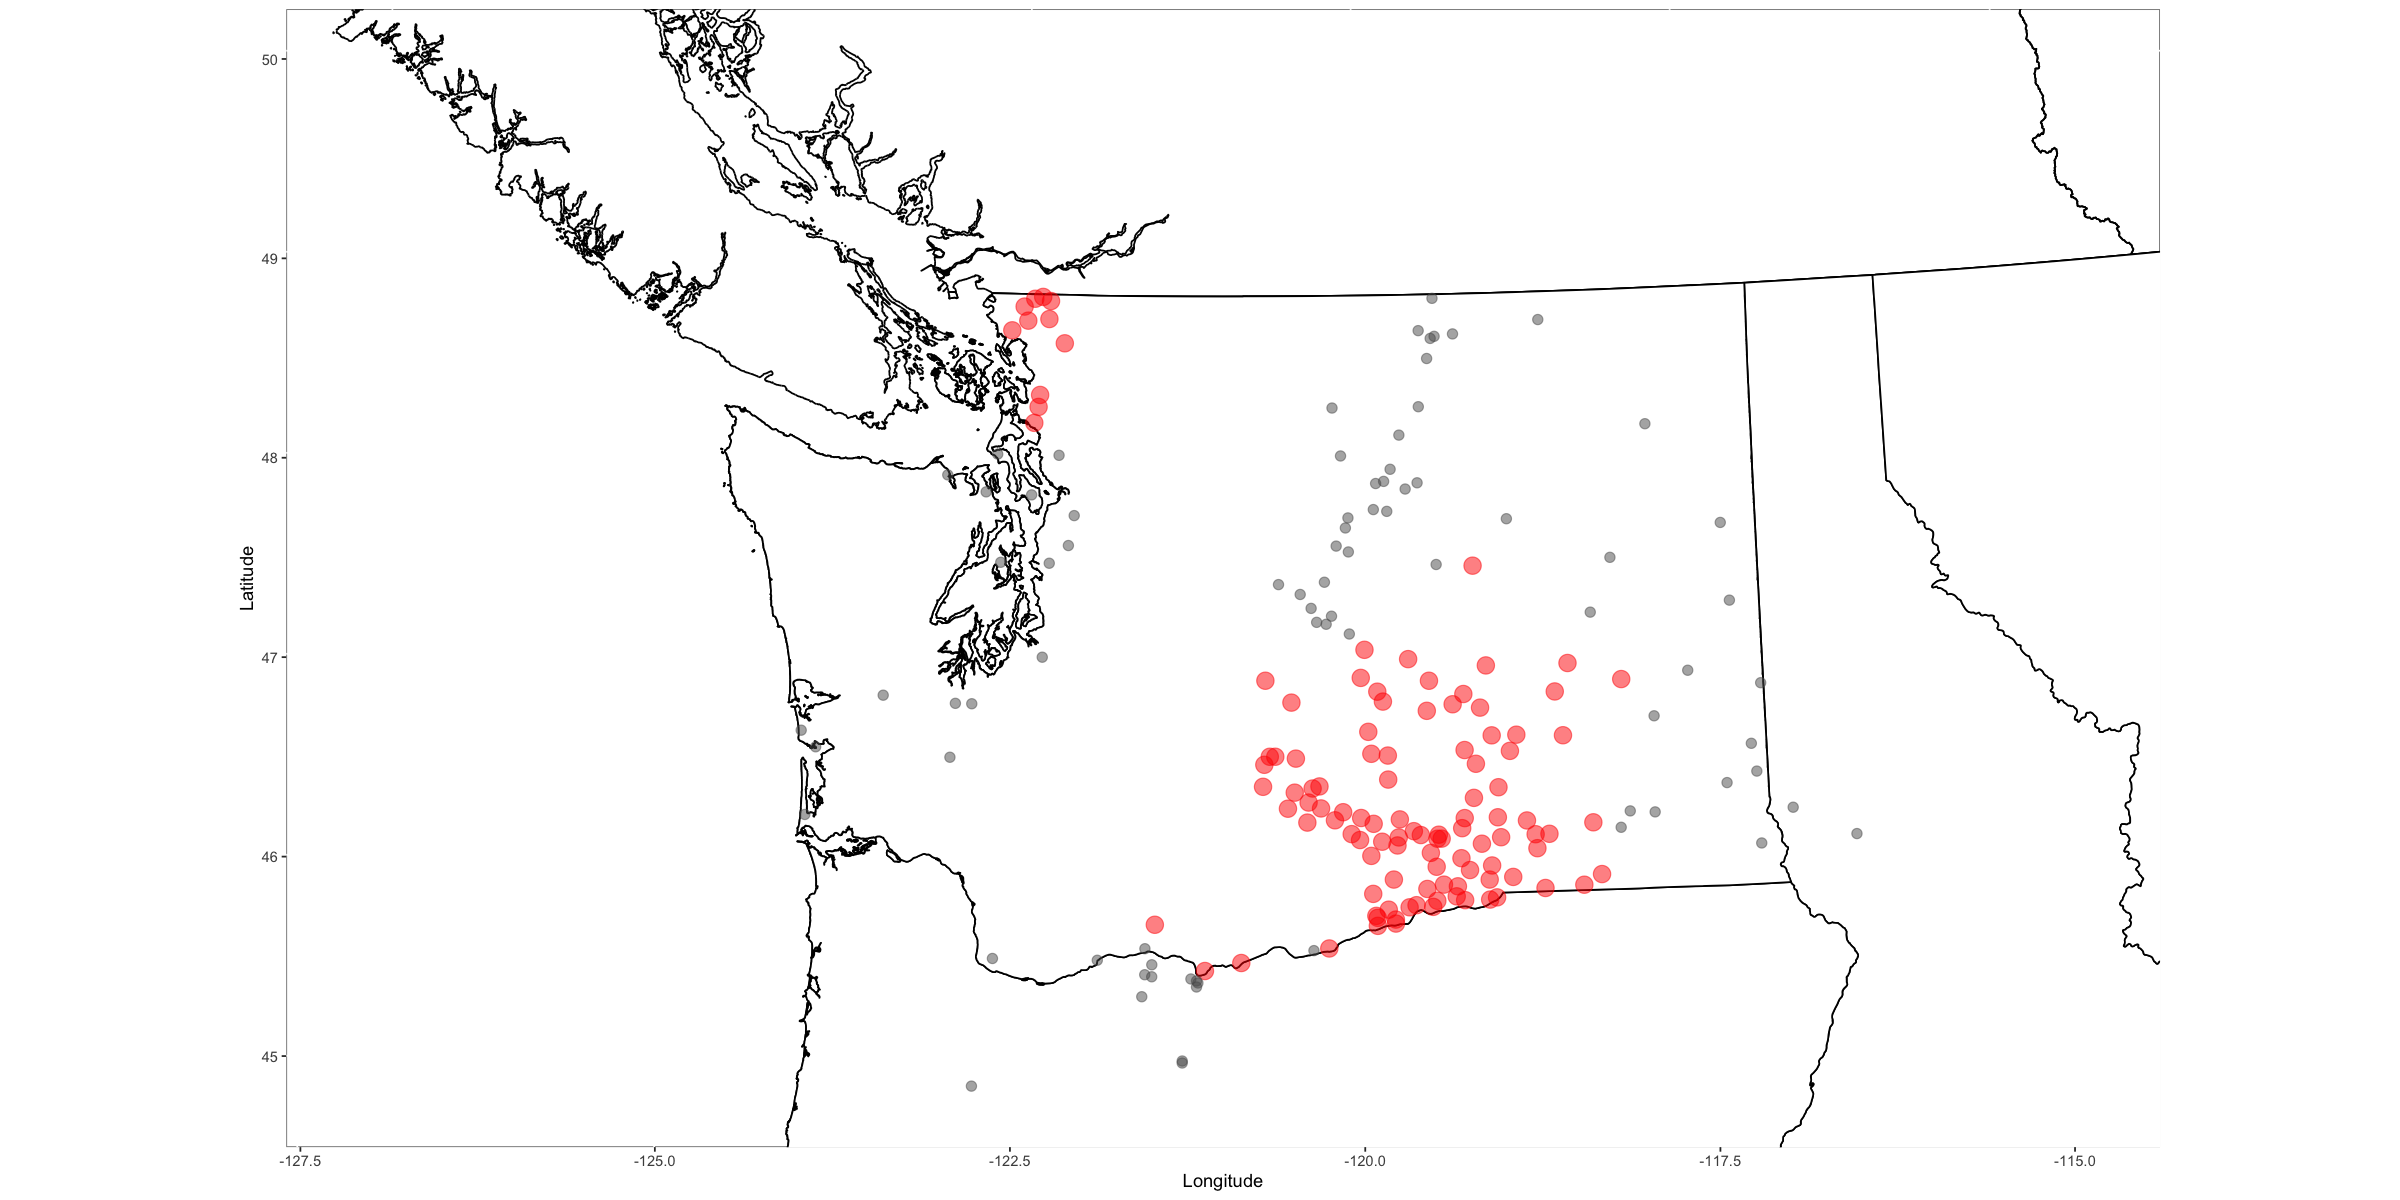

In [43]:
# Change plot size to X x Y
options(repr.plot.width=20, repr.plot.height=10)
# Plot
ggplot(data=us.states,
       aes(x=long, y=lat, group=group))+
  geom_path(size=0.5)+
  geom_path(data=ca.provinces, size=0.5)+
  geom_polygon(fill="white", colour = "black", size=0.5)+
  theme(panel.background = element_rect(fill = "white", colour = "grey50"))+
  coord_map("bonne", lat0 = 50,
            xlim = c(-127, -115),ylim = c(45, 50))+
  xlab("Longitude") +
  ylab("Latitude") +

  geom_point(data=AWN[County == "Whatcom" | County == "Skagit" | County == "Kittitas" | County == "Grant" | County == "Adams" |
                      County == "Franklin" | County == "Benton" |  County == "Walla Walla" | County == "Klickitat" | County == "Yakima" , ], 
             aes(x=Longitude * -1, y=Latitude), # Change sign of longitude
             pch=20, alpha=0.5, size=7, col="red",
             inherit.aes = FALSE) +

geom_point(data=AWN[County != "Whatcom" & County != "Skagit" & County != "Kittitas" & County != "Grant" & County != "Adams" &
                      County != "Franklin" & County != "Benton" &  County != "Walla Walla" & County != "Klickitat" & County != "Yakima" , ], 
             aes(x=Longitude * -1, y=Latitude), # Change sign of longitude
             pch=20, alpha=0.5, size=4, col="grey35",
             inherit.aes = FALSE)

Station.ID,Station.Name,Tier,Sponsor,Installation.Date,Data.Quality.Review.Date,Latitude,Longitude,Station.Elevation..ft.,County,⋯,Second..additional..Rainfall.Sensor,Wind.Speed.Sensor,Wind.Direction.Sensor,Leaf.Wetness.Sensor,Pyranometer,Soil.Temperature.Probe.at.2.inch.depth,Soil.Temperature.Probe.at.8.inch.depth,Soil.Moisture.Probe.at.8.inch.depth,Barometric.Pressure.Sensor,Station.Zone
<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>
100022,Pomeroy.E,Tier 2,WSU AgWeatherNet,2019-11-14,2019-11-14,46.51,117.34,2760,Garfield,⋯,N,Y,Y,N,Y,N,Y,N,Y,4


In [41]:
t = AWN[County != "Walla Walla" ,]

In [42]:
sort(unique(t$County))

[1]              Adams        Asotin       Benton       Chelan      
 [6] Clallam      Clark        Columbia     Douglas      Ferry       
[11] Franklin     Garfield     Grant        Grays Harbor Hood River  
[16] Island       Jefferson    King         Kitsap       Kittitas    
[21] Klickitat    Lewis        Lincoln      Linn         Marion      
[26] Nez Perce    Okanogan     Pacific      Pierce       Skagit      
[31] Skamania     Snohomish    Spokane      Stevens      Thurston    
[36] Wasco        Whatcom      Whitman      Yakima      
40 Levels:  Adams Asotin Benton Chelan Clallam Clark Columbia Douglas ... Yakima